In [1]:
import numpy as np
import matplotlib.pyplot as plt

from outer import outer
from utils.entropy import h
from utils.utils import Source, Channel, Equivocation, ConverseParams

from utils.spatial import get_convex_hull

In [2]:
indirect = True
converse_points = 100
precision = np.float64
eps = np.finfo(precision).eps
R_range = np.linspace(eps, 3.0, converse_points, dtype=precision)
Ds_range = np.geomspace(0.39, 1.0, converse_points, dtype=precision)
Du_range = np.geomspace(eps, 2.5, converse_points, dtype=precision)
R, Ds, Du = np.meshgrid(R_range, Ds_range, Du_range, indexing='ij')

In [3]:
src = Source(Ps = 0.7, Pu = 1.0, Psu = 0.5)
ch  = Channel(P = 1.0, Pn1 = 0.10, Pn2 = 0.15)
eqv = Equivocation(deltaS=h(src.Ps), deltaU=0.0, deltaSU=h(src.Ps))

In [4]:
params = ConverseParams(R, Ds, Du, eqv, src, ch, indirect=indirect)
mask = outer(params)
hull, points = get_convex_hull(mask, R_range, Ds_range, Du_range)
hull = hull[:-1,:]

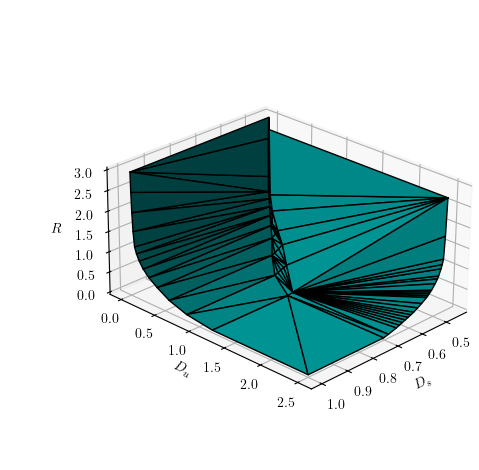

In [5]:
import matplotlib
%matplotlib inline
plt.rcParams['text.usetex'] = True

x_scale=1.2
y_scale=1.5
z_scale=1.0

from mpl_toolkits.mplot3d.axes3d import Axes3D

scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0

def short_proj():
  return np.dot(Axes3D.get_proj(ax), scale)

light = matplotlib.colors.LightSource(170,20)

fig = plt.figure() 
ax = plt.axes(projection="3d")
ax.get_proj = short_proj
ax.view_init(elev=25, azim=45, roll=0)
ax.plot_trisurf(hull[:,1],hull[:,2],hull[:,0], color='c', shade=True, edgecolor='k', linewidth=1, antialiased=True, lightsource=light)
ax.set_xlabel('$D_s$'); ax.set_ylabel('$D_u$'); ax.set_zlabel('$R$')
plt.tight_layout()
#plt.savefig('outer.pdf')
plt.show()